In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from Chemometrics.basic import psave,pload
import opusFC #读取IR数据
import re
import graphviz
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline

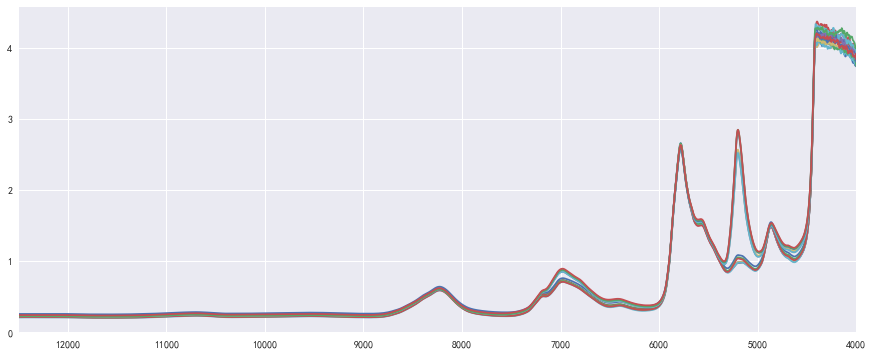

In [3]:
path = './Tween20-验证光谱/'
import os
flist = os.listdir(path)
fs = [ path+f for f in flist if '.'in f ]
ys = []
for f in fs:
    dbs = opusFC.listContents(f)
    data = opusFC.getOpusData(f, dbs[0])
    ys.append(data.y)
    x = data.x
IRdata = pd.DataFrame(np.vstack(ys))
IRdata.columns = data.x
def regstr(text, regexp):
    # 正则匹配子字符串
    m = re.search(regexp, text)
    if m:
        return m.group(0)  
a = [regstr(i,'^.+(?=-[0-9]{1})') for i in flist if '.' in i]
IRdata.index = a
plt.rcParams['figure.figsize'] = (15,6)
IRdata.T.plot(legend=False)

In [44]:
#平均平行样品，得到test集
avgIR_test = IRdata.groupby(IRdata.index).mean()
#载入训练集
avgIRdata = pload('tw20_IRavg.p')

In [41]:
# 找出test集中存在于训练集中的样本
# pandas.index.isin()
avgIR_test.index.isin(avgIRdata.index).all()

True

可以看出验证集中所有样本都在训练集中，验证拟合效果。